In [115]:
from tqdm import tqdm_notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/arjoonn/dev/notebooks/env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Say we want to map colors (RGB) to some 2D representation

In [116]:
allcolors = ((r, g, b)
             for r in range(256)
             for g in range(256)
             for b in range(256)
            )
# We use a generator since my laptop does not have a lot of RAM
# Consider it to be a list of tuples.

We'll make an SOM with 20x20 nodes in a 2D plane. Initially it will have random weights. As each weight is in fact a candidate in the original data, it must be 3 dimensional.

In [117]:
som = (np.random.random((20, 20, 3))*255).astype(float)  # 5x4 nodes. each node having 3 dim for color

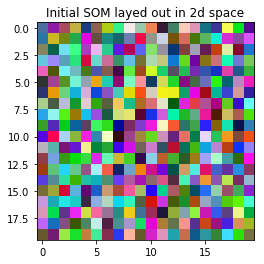

In [118]:
plt.imshow(som)
plt.title('Initial SOM layed out in 2d space')

# Training

We will keep things simple for illustration. A falloff function is created to calculate update falloff.

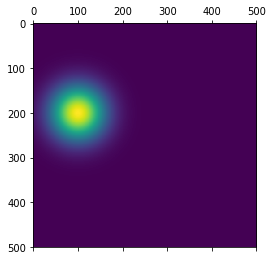

In [119]:
def falloff(center, size, falloff_factor):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]
    x0, y0 = center
    fwhm=falloff_factor
    d = np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)
    return d.reshape((size, size, 1))
plt.matshow(falloff((100, 200), 500, 100).reshape((500, 500)))

In [120]:
We will ignore nbd falloff for now to make implementation easier. It can be incorporated into calculations by using the above function

SyntaxError: invalid syntax (<ipython-input-120-6f5ce672dc16>, line 1)

In [121]:
learning_rate = 1

for index, datapoint in tqdm_notebook(enumerate(allcolors), total=256**3):  # Iterate over dataset
    if index % 100 == 0:
        neighbourhood_falloff += 1
    datapoint = np.array(datapoint)
    
    # how different is each node in SOM from this point?
    diff = som - datapoint
    # We calculate RMSE
    rms = np.sqrt(np.square(diff))
    rmse = rms.sum(axis=2)
    
    # Which is lowest error?
    min_arg = np.argmin(rmse) # This is the index in a flattened SOM
    # Convert it to x, y
    x = min_arg // som.shape[1]  # 4 in a row. x rows have gone by
    y = min_arg % som.shape[1]  # Whatever is left is the col index
    
    # calculate the maximal change required.
    change = datapoint - som.flatten()[min_arg]
    # calculate what fraction of change is applied how far away from the point
    som [x, y]+= change

KeyboardInterrupt: 

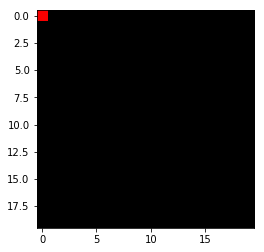

In [122]:
plt.imshow(som)

Now, any data point in the dataset will have a node which is maximally like it. That node's x, y is the new representation.